<a href="https://colab.research.google.com/github/tizwe/Grundlegendes-Multilayer-Neuronales-Netzwerk/blob/master/NeuronalesNetz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import random 
import numpy as np 

#Zentren der Klassen definieren
c1_1=[1.5,1.5]
c1_2=[0,-1]
c2=[1.2,0]

#Parameter
n_samples=1000
cluster1=[]
cluster2=[]
sigma=0.7


"""
Instanzen einer Klasse werden erzeugt.
Diese sind Normalverteilt N(0,sigma^2) um deren
Zentren.
In der dritten Achse speichern wir die Klasse
--> (x1,x2,c)
"""
for i in range(n_samples):
  new_sample1=random.choice([c1_1,c1_2])+np.random.normal(size=2)*sigma
  new_sample1=np.append(new_sample1,0)

  new_sample2=c2+np.random.normal(size=2)*sigma
  new_sample2=np.append(new_sample2,1)

  cluster1.append(new_sample1)
  cluster2.append(new_sample2)

#Daten werden zusammengefügt und gemischt
data=np.concatenate((cluster1,cluster2))
np.random.shuffle(data)



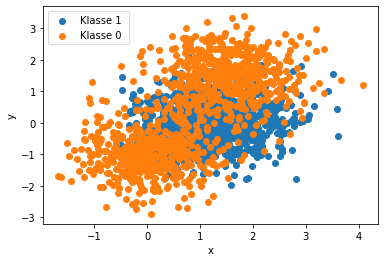

In [ ]:
#Visualisierung der Daten

plt.scatter(*zip(*np.array(cluster2)[:,0:2]),label='Klasse 1')
plt.scatter(*zip(*np.array(cluster1)[:,0:2]),label='Klasse 0 ')
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [ ]:
#Aktivierungsfunktionen und deren Ableitungen 
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_p(x):
    return 1-np.square(tanh(x))


#Training (1 Hidden-Layer)


In [ ]:
hist=[]
def train():
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 2000
    learning_rate = 0.3
    costs = [] # keep costs during training, see if they go down
   
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)

        c=0
        for p in data: 
            p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
            c += np.square(p_pred - p[2])
        hist.append(c)


        # print the cost over all data points every 100 iters
        if i % 100 == 0:
            c = 0
            for p in data:
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b

#Training (2 Hidden-Layers)




In [ ]:
def train(dta,lr):
    
    #Startwerte der Gewichte werden zufällig erzeugt

    wscale=1 #Anpassung der Größe der Startgewichte
    w1 = np.random.randn()*wscale
    w2 = np.random.randn()*wscale
    v1 = np.random.randn()*wscale
    v2 = np.random.randn()*wscale
    b1 = np.random.randn()*wscale
    b2 = np.random.randn()*wscale
    b3 = np.random.randn()*wscale
    u1 = np.random.randn()*wscale
    u2 = np.random.randn()*wscale
    
    cost_hist = [] #Speichert den Kostenverlauf


    iterations = 1500
    learning_rate = lr

    for i in range(iterations):
        #Nehme zufälligen Punkt aus dem Datensatz
        ri = np.random.randint(len(dta))
        point = dta[ri]

        hidden1 = point[0] * w1 + point[1] * w2 + b1 
        hidden2 = point[0] * v1 + point[1] * v2 + b2
        z=u1*tanh(hidden1)+u2*tanh(hidden2)+b3

        pred = sigmoid(z) # Netzwerk Prognose
        
        target = point[2]

        ###
        
        #Kosten berechnen und speichern 
        #Nicht relevant für Training  (Kann auskommentiert werden )
        #Trotzdem verantwortlich für ca 95% der Trainingszeit !!! 
        c=0
        global freq
        freq=10
        if i%100==0:
          for p in data: 
              p_pred = sigmoid( u1*tanh((w1 * p[0] + w2 * p[1] + b1)) + 
                                u2*tanh((v1 * p[0] + v2 * p[1] +b2 ))+b3)
              c += np.square(p_pred - p[2])
          cost_hist.append(c/data.shape[0])
          
        ###

        # Kosten für momentanen Punkt
        cost = np.square(pred - target)

        #Mithilfe der Kettenregel werden die Gradienten berechnet 

        dcost_dpred = 2*(pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_du1  = tanh(hidden1)
        dz_du2  = tanh(hidden2)
        dz_dhidden1  = u1*tanh_p(hidden1)
        dz_dhidden2  = u2*tanh_p(hidden2)
        dhidden1_dw1 = point[0]
        dhidden1_dw2 = point[1]
        dhidden2_dv1 = point[0]
        dhidden2_dv2 = point[1]
        dhidden1_db1 = 1
        dhidden2_db2 = 1
        dz_db3= 1

        dcost_dz = dcost_dpred * dpred_dz
        dcost_dw1 = dcost_dz * dz_dhidden1 *dhidden1_dw1 
        dcost_dw2 = dcost_dz * dz_dhidden1 *dhidden1_dw2
        dcost_db1 = dcost_dz * dz_dhidden1 *dhidden1_db1   
        dcost_dv1 = dcost_dz * dz_dhidden2 *dhidden2_dv1 
        dcost_dv2 = dcost_dz * dz_dhidden2 *dhidden2_dv2  
        dcost_db2 = dcost_dz * dz_dhidden2 *dhidden2_db2
        dcost_du1 = dcost_dz*  dz_du1
        dcost_du2 = dcost_dz*  dz_du2
        dcost_db3 = dcost_dz*  dz_db3


        #Update der Parameter
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        v1 = v1 - learning_rate * dcost_dv1
        v2 = v2 - learning_rate * dcost_dv2
        b1 = b1 - learning_rate * dcost_db1
        b2 = b2 - learning_rate * dcost_db2
        b3 = b3 - learning_rate * dcost_db3
        u1 = u1 - learning_rate * dcost_du1
        u2 = u2 - learning_rate * dcost_du2
        
    #Gebe die Kosten und Parameter aus
    return cost_hist, w1, w2,v1,v2, b1,b2,b3,u1,u2

In [ ]:
#Training zu vershciedenen Lernraten
a=train(data,0.03)
print('a fertig!')
b=train(data,0.3)
print('b fertig!')
c=train(data,1.5)
print('c fertig!')



a fertig!
b fertig!
c fertig!


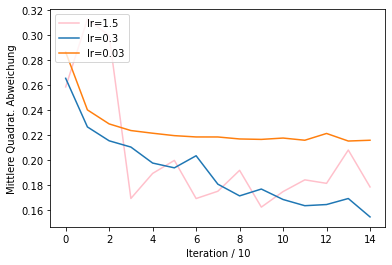

In [ ]:
#Vergleich Trainingsverlauf zu verschiedenen Lernraten
plt.plot(c[0],label='lr=1.5',color='pink')
plt.plot(b[0],label='lr=0.3')
plt.plot(a[0],label='lr=0.03')
plt.legend(loc='upper left')
plt.xlabel('Iteration / '+str(freq))
plt.ylabel('Mittlere Quadrat. Abweichung')
plt.show()

#Wir werden mit 'b' fortfahren

In [ ]:
#Funktion zur Auswertung eines Datenpunktes 
def predc(p,param):
  _, w1, w2,v1,v2, b1,b2,b3,u1,u2 = param

  return sigmoid( u1*tanh((w1 * p[0] + w2 * p[1] + b1)) + 
             u2*tanh((v1 * p[0] + v2 * p[1] +b2 ))+b3)

# Ts


Helle Werte haben einen Wert zwischen 0.25 un 0.75
Bei diesen Werten ist das Netzwerk weniger konfident mit seinen Vorhersagen


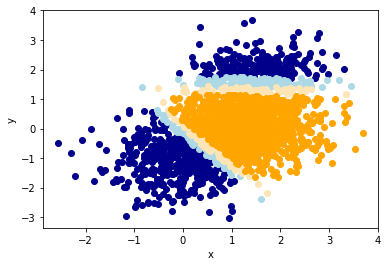

In [ ]:
#Das Netzwerk gibt für einen Input Punkt einen Wert zwischen 0 und 1 aus
#welcher als vermutete Wahrschienlichkeit für eine Zugehörigkeit dieses Punktes zu Klasse 1
#interpretiert werden kann.
#Der Gerundete Wert der Ausagbe gibt die vom Netzwerk vorhergesagte Klasse an 

cluster1=[]
cluster2=[]


print('Helle Werte haben einen Wert zwischen 0.25 un 0.75')
print('Bei diesen Werten ist das Netzwerk weniger konfident mit seinen Vorhersagen')
for i in range(int(n_samples)):
  new_sample1 =random.choice([c1_1,c1_2])+np.random.normal(size=2)*sigma
  prediction=np.floor(4*predc(new_sample1,b))
  new_sample1=np.append(new_sample1,prediction)

  new_sample2=c2+np.random.normal(size=2)*sigma
  prediction=np.floor(4*predc(new_sample2,b))
  new_sample2=np.append(new_sample2,prediction)

  cluster1.append(new_sample1)
  cluster2.append(new_sample2)
data1=np.concatenate((cluster1,cluster2))
np.random.shuffle(data1)
dta=[[],[],[],[]]
for d in data1: 
  dta[min(int(d[2]),3)].append(d[0:2])
try:
  plt.scatter(*zip(*np.array(dta[0])),c='darkblue')
except:
  pass
try:
  plt.scatter(*zip(*np.array(dta[1])),c='lightblue')
except:
  pass
try:
  plt.scatter(*zip(*np.array(dta[2])),c='moccasin')
except:
  pass
try:
  plt.scatter(*zip(*np.array(dta[3])),c='orange')
except:
  pass

#plt.scatter(*zip(*np.array(cluster1)[:,0:2]))
#plt.scatter(*zip(*np.array(cluster2)[:,0:2]))


plt.xlabel('x')
plt.ylabel('y')
plt.show()

Punkte in blauen Zonen werden vom Netzwerk der Klasse 0 zugeordent;
Punkte in den orangenen der Klasse 1


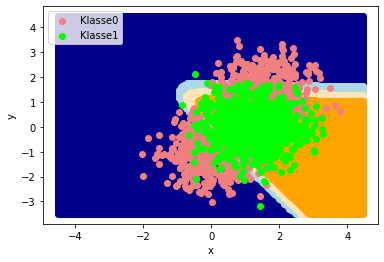

In [ ]:
print('Punkte in blauen Zonen werden vom Netzwerk der Klasse 0 zugeordent;')
print('Punkte in den orangenen der Klasse 1')

cluster1=[]
cluster2=[]
gt=[]
x = np.arange(-4.5, 4.5, 0.05)
y = np.arange(-3.5, 4.5, 0.05)
X,Y = np.meshgrid(x,y)
gt=np.array([X.flatten(),Y.flatten()]).T
for i in gt:
  prediction=np.floor(4*predc(i,b))
  new_sample1=np.append(i,prediction)
  cluster1.append(new_sample1)
data1=cluster1
np.random.shuffle(data1)
dta=[[],[],[],[]]
for d in data1: 
  dta[min(int(d[2]),3)].append(d[0:2])

plt.scatter(*zip(*np.array(dta[0])),c='darkblue')
plt.scatter(*zip(*np.array(dta[1])),c='lightblue')
plt.scatter(*zip(*np.array(dta[2])),c='moccasin')
plt.scatter(*zip(*np.array(dta[3])),c='orange')

cluster1=[]
cluster2=[]
for i in range(int(n_samples)):
  new_sample1 =random.choice([c1_1,c1_2])+np.random.normal(size=2)*sigma
  new_sample1=np.append(new_sample1,0)
  new_sample2=c2+np.random.normal(size=2)*sigma
  prediction=np.floor(4*predc(new_sample2,a))
  new_sample2=np.append(new_sample2,1)
  cluster1.append(new_sample1)
  cluster2.append(new_sample2)
data1=np.concatenate((cluster1,cluster2))
np.random.shuffle(data1)
dta=[[],[],[],[]]
for d in data1: 
  dta[min(int(d[2]),3)].append(d[0:2])

plt.scatter(*zip(*np.array(dta[0])),c='lightcoral',label='Klasse0')
plt.scatter(*zip(*np.array(dta[1])),c='lime',label='Klasse1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()



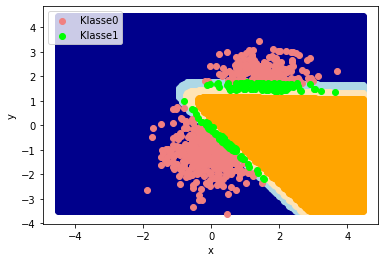

In [ ]:
cluster1=[]
cluster2=[]
gt=[]

x = np.arange(-4.5, 4.5, 0.05)
y = np.arange(-3.5, 4.5, 0.05)
X,Y = np.meshgrid(x,y)
gt=np.array([X.flatten(),Y.flatten()]).T
for i in gt:
  prediction=np.floor(4*predc(i,b))
  new_sample1=np.append(i,prediction)
  cluster1.append(new_sample1)
data1=cluster1
np.random.shuffle(data1)
dta=[[],[],[],[]]


for d in data1: 
  #print(d[2])
  dta[min(int(d[2]),3)].append(d[0:2])

try:
  plt.scatter(*zip(*np.array(dta[0])),c='darkblue')
except:
  pass 
try:
  plt.scatter(*zip(*np.array(dta[1])),c='lightblue')

except:
  pass
try:
  plt.scatter(*zip(*np.array(dta[2])),c='moccasin')

except:
  pass
try:
  plt.scatter(*zip(*np.array(dta[3])),c='orange')
except:
  pass

cluster1=[]
cluster2=[]
for i in range(int(n_samples)):
  new_sample1 =random.choice([c1_1,c1_2])+np.random.normal(size=2)*sigma
  prediction=np.floor(4*predc(new_sample1,b))
  new_sample1=np.append(new_sample1,prediction)

  new_sample2=c2+np.random.normal(size=2)*sigma
  prediction=np.floor(4*predc(new_sample2,b))
  new_sample2=np.append(new_sample2,prediction)

  cluster1.append(new_sample1)
  cluster2.append(new_sample2)

data1=np.concatenate((cluster1,cluster2))
np.random.shuffle(data1)
dta=[[],[],[],[]]
for d in data1: 
  #print(d[2])
  dta[min(int(d[2]),3)].append(d[0:2])

try:
  plt.scatter(*zip(*np.array(dta[0])),c='lightcoral',label='Klasse0')
except:
  pass
try:
  plt.scatter(*zip(*np.array(dta[1])),c='lime',label='Klasse1')
except:
  pass
#plt.scatter(*zip(*np.array(cluster1)[:,0:2]))
#plt.scatter(*zip(*np.array(cluster2)[:,0:2]))
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

In [ ]:
cor=0
flse=0
for q,n in zip(cluster1,range(1000)): 
  if np.round(q[2]/4) == 0:
    cor+=1
  else:
    flse+=1
for q in cluster2: 
  if np.round(q[2]/4) == 1:
    cor+=1
  else:
    flse+=1

print(cor/(cor+flse),'% of the network estimations were correct')


0.7845 % of the network estimations were correct
